# MLP Regressor - Boston Housing Data



João Vitor de Paiva Marcotti

Electrical Engineer - State University of Maringá - UEM (Brazil)

8th Semester Economics Student - Cesumar University - UniCesumar (Brazil)

Open to Work

Contact: joaovmarcotti@hotmail.com



In [ ]:
# Imports the libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import tensorflow as tf
from sklearn.metrics import r2_score

In [ ]:
# Imports the boston housing data
boston_housing = tf.keras.datasets.boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [ ]:
# Defines the X columns
x_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

 CRIM - per capita crime rate by town

 ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS - proportion of non-retail business acres per town

 CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 NOX - nitric oxides concentration (parts per 10 million)

 RM - average number of rooms per dwelling

 AGE - proportion of owner-occupied units built prior to 1940

 DIS - weighted distances to five Boston employment centres

 RAD - index of accessibility to radial highways

 TAX - full-value property-tax rate per $10,000

 PTRATIO - pupil-teacher ratio by town

 B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 LSTAT - % lower status of the population

 MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
# Defines the X dataframe
df_x_train = pd.DataFrame(x_train,columns=x_columns)
df_x_test = pd.DataFrame(x_test,columns=x_columns)

df = pd.concat([df_x_train, df_x_test], ignore_index=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71


In [ ]:
# Adds the Y variable into the X dataframe to use it in the heatmap
df_y_train = pd.DataFrame(y_train,columns=['MEDV'])
df_y_test = pd.DataFrame(y_test,columns=['MEDV'])

df_y = pd.concat([df_y_train, df_y_test], ignore_index=True)
df['MEDV'] = df_y.values

<Axes: >

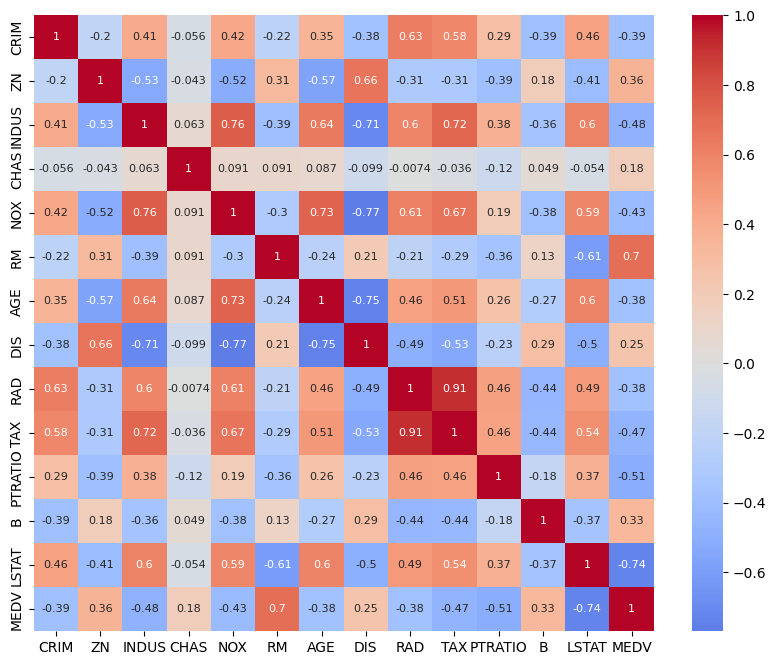

In [ ]:
# Displays a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, annot_kws={"size": 8})

In [ ]:
# Declares four arrays that will be used later
r2_train_total = []
r2_test_total = []
test_loss_total = []
val_loss_total = []

# MLP Model

In [ ]:
# Creates the Multilayer Perceptron Model (MLP)

def MLP_model(x_train_scaled,x_test_scaled, y_train_scaled, y_test_scaled):

  model = Sequential([
      Dense(16,input_dim=x_train_scaled.shape[1],kernel_initializer='random_uniform',activation='relu',use_bias=False),
      Dense(128,kernel_initializer='random_uniform',activation='relu',use_bias=False),
      Dropout(0.2),
      Dense(1,kernel_initializer='random_uniform',activation='relu',use_bias=False)
  ])

  model.compile(loss='mse',
                optimizer='adam',)

  history = model.fit(x_train_scaled, y_train_scaled, validation_split=0.1, epochs=200)

  y_train_predict = model.predict(x_train_scaled)
  y_test_predict = model.predict(x_test_scaled)

  r2_train = round(r2_score(y_train_scaled, np.array(pd.DataFrame(y_train_predict)[0])),4)
  r2_test = round(r2_score(y_test_scaled, np.array(pd.DataFrame(y_test_predict)[0])),4)

  test_loss = round(history.history['loss'][-1],4)
  val_loss = round(history.history['val_loss'][-1],4)

  return r2_train, r2_test, test_loss, val_loss

# First Test - First 3 variables

In [ ]:
# Takes just the first 3 X variables
df1 = df.iloc[:,:3]
df1

,CRIM,ZN,INDUS
0,1.23247,0.0,8.14
1,0.02177,82.5,2.03
2,4.89822,0.0,18.10
3,0.03961,0.0,5.19
4,3.69311,0.0,18.10
...,...,...,...
501,3.47428,0.0,18.10
502,0.07896,0.0,12.83
503,1.83377,0.0,19.58
504,0.35809,0.0,6.20


In [ ]:
# Splits the X dataset into train and test
x_train = np.array(df1[0:x_train.shape[0]])
x_test = np.array(df1[x_train.shape[0]:])

In [ ]:
# Scales the X and Y datasets

sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

y_train_scaled = sc.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc.fit_transform(y_test.reshape(-1, 1))

In [ ]:
# Runs the model
r2_train, r2_test, test_loss, val_loss = MLP_model(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled)

Epoch 1/200
12/12 [==============================] - 1s 15ms/step - loss: 1.0544 - val_loss: 0.5122
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 1.0505 - val_loss: 0.5083
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 1.0395 - val_loss: 0.4993
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 1.0152 - val_loss: 0.4835
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: 0.9771 - val_loss: 0.4607
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 0.9327 - val_loss: 0.4442
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 0.8996 - val_loss: 0.4469
Epoch 8/200
12/12 [==============================] - 0s 6ms/step - loss: 0.8973 - val_loss: 0.4479
Epoch 9/200
12/12 [==============================] - 0s 6ms/step - loss: 0.8928 - val_loss: 0.4411
Epoch 10/200
12/12 [==============================] - 0s 4ms/step - loss: 0.8914 - val_loss: 0.4396
Epoch 11

In [ ]:
# Displays the model R2 and loss during train, test and validation

print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)

r2_train_total.append(r2_train)
r2_test_total.append(r2_test)
test_loss_total.append(test_loss)
val_loss_total.append(val_loss)

Train R²: 0.2011
Test R²: 0.1416
Test Loss: 0.8502
Validation Loss: 0.3994


# Second Test - Last 3 variables

In [ ]:
# Takes just the last 3 X variables
df2 = df.iloc[:,-3:]
df2

,B,LSTAT,MEDV
0,396.90,18.72,15.2
1,395.38,3.11,42.3
2,375.52,3.26,50.0
3,396.90,8.01,21.1
4,391.43,14.65,17.7
...,...,...,...
501,354.55,5.29,21.9
502,394.92,6.78,24.1
503,389.61,1.92,50.0
504,391.70,9.71,26.7


In [ ]:
# Splits the X dataset into train and test
x_train = np.array(df2[0:x_train.shape[0]])
x_test = np.array(df2[x_train.shape[0]:])

In [ ]:
# Scales the X and Y datasets

sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

y_train_scaled = sc.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc.fit_transform(y_test.reshape(-1, 1))

In [ ]:
# Runs the model
r2_train, r2_test, test_loss, val_loss = MLP_model(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled)

Epoch 1/200
12/12 [==============================] - 1s 62ms/step - loss: 1.0491 - val_loss: 0.5080
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 1.0289 - val_loss: 0.4958
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.9815 - val_loss: 0.4688
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.8859 - val_loss: 0.4213
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: 0.7298 - val_loss: 0.3623
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 0.5321 - val_loss: 0.3251
Epoch 7/200
12/12 [==============================] - 0s 5ms/step - loss: 0.4117 - val_loss: 0.3244
Epoch 8/200
12/12 [==============================] - 0s 4ms/step - loss: 0.3698 - val_loss: 0.3067
Epoch 9/200
12/12 [==============================] - 0s 6ms/step - loss: 0.3493 - val_loss: 0.3016
Epoch 10/200
12/12 [==============================] - 0s 5ms/step - loss: 0.3447 - val_loss: 0.3018
Epoch 11

In [ ]:
# Displays the model R2 and loss during train, test and validation

print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)

r2_train_total.append(r2_train)
r2_test_total.append(r2_test)
test_loss_total.append(test_loss)
val_loss_total.append(val_loss)

Train R²: 0.6658
Test R²: 0.5988
Test Loss: 0.3423
Validation Loss: 0.3012


# Third Test - First 6 Variables

In [ ]:
# Takes just the first 6 variables
df3 = df.iloc[:,:6]
df3

,CRIM,ZN,INDUS,CHAS,NOX,RM
0,1.23247,0.0,8.14,0.0,0.538,6.142
1,0.02177,82.5,2.03,0.0,0.415,7.610
2,4.89822,0.0,18.10,0.0,0.631,4.970
3,0.03961,0.0,5.19,0.0,0.515,6.037
4,3.69311,0.0,18.10,0.0,0.713,6.376
...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780
502,0.07896,0.0,12.83,0.0,0.437,6.273
503,1.83377,0.0,19.58,1.0,0.605,7.802
504,0.35809,0.0,6.20,1.0,0.507,6.951


In [ ]:
# Splits the X dataset into train and test
x_train = np.array(df3[0:x_train.shape[0]])
x_test = np.array(df3[x_train.shape[0]:])

In [ ]:
# Scales the X and Y datasets

sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

y_train_scaled = sc.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc.fit_transform(y_test.reshape(-1, 1))

In [ ]:
# Runs the model
r2_train, r2_test, test_loss, val_loss = MLP_model(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled)

Epoch 1/200
12/12 [==============================] - 1s 14ms/step - loss: 1.0529 - val_loss: 0.5096
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 1.0369 - val_loss: 0.4976
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 1.0013 - val_loss: 0.4701
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.9160 - val_loss: 0.4239
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 0.8006 - val_loss: 0.3997
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 0.7099 - val_loss: 0.4109
Epoch 7/200
12/12 [==============================] - 0s 7ms/step - loss: 0.6457 - val_loss: 0.4003
Epoch 8/200
12/12 [==============================] - 0s 5ms/step - loss: 0.5945 - val_loss: 0.4117
Epoch 9/200
12/12 [==============================] - 0s 5ms/step - loss: 0.5617 - val_loss: 0.4199
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5439 - val_loss: 0.4025
Epoch 11

In [ ]:
# Displays the model R2 and loss during train, test and validation

print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)

r2_train_total.append(r2_train)
r2_test_total.append(r2_test)
test_loss_total.append(test_loss)
val_loss_total.append(val_loss)

Train R²: 0.5709
Test R²: 0.3134
Test Loss: 0.4332
Validation Loss: 0.4369


# Fourth Test - Last 6 Variables

In [ ]:
# Takes just the last 6 variables
df4 = df.iloc[:,-6:]
df4

,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,4.0,307.0,21.0,396.90,18.72,15.2
1,2.0,348.0,14.7,395.38,3.11,42.3
2,24.0,666.0,20.2,375.52,3.26,50.0
3,5.0,224.0,20.2,396.90,8.01,21.1
4,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...
501,24.0,666.0,20.2,354.55,5.29,21.9
502,5.0,398.0,18.7,394.92,6.78,24.1
503,5.0,403.0,14.7,389.61,1.92,50.0
504,8.0,307.0,17.4,391.70,9.71,26.7


In [ ]:
# Splits the X dataset into train and test
x_train = np.array(df4[0:x_train.shape[0]])
x_test = np.array(df4[x_train.shape[0]:])

In [ ]:
# Scales the X and Y datasets

sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

y_train_scaled = sc.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc.fit_transform(y_test.reshape(-1, 1))

In [ ]:
# Runs the model
r2_train, r2_test, test_loss, val_loss = MLP_model(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled)

Epoch 1/200
12/12 [==============================] - 1s 31ms/step - loss: 1.0504 - val_loss: 0.5064
Epoch 2/200
12/12 [==============================] - 0s 17ms/step - loss: 1.0237 - val_loss: 0.4847
Epoch 3/200
12/12 [==============================] - 0s 20ms/step - loss: 0.9595 - val_loss: 0.4374
Epoch 4/200
12/12 [==============================] - 0s 18ms/step - loss: 0.8334 - val_loss: 0.3768
Epoch 5/200
12/12 [==============================] - 0s 23ms/step - loss: 0.6657 - val_loss: 0.3466
Epoch 6/200
12/12 [==============================] - 0s 16ms/step - loss: 0.5407 - val_loss: 0.3332
Epoch 7/200
12/12 [==============================] - 0s 17ms/step - loss: 0.4450 - val_loss: 0.3103
Epoch 8/200
12/12 [==============================] - 0s 18ms/step - loss: 0.3897 - val_loss: 0.3116
Epoch 9/200
12/12 [==============================] - 0s 21ms/step - loss: 0.3717 - val_loss: 0.3169
Epoch 10/200
12/12 [==============================] - 0s 19ms/step - loss: 0.3684 - val_loss: 0.3143

In [ ]:
# Displays the model R2 and loss during train, test and validation

print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)

r2_train_total.append(r2_train)
r2_test_total.append(r2_test)
test_loss_total.append(test_loss)
val_loss_total.append(val_loss)

Train R²: 0.6659
Test R²: 0.5994
Test Loss: 0.341
Validation Loss: 0.3014


# Fifth Test - First 9 Variables

In [ ]:
# Takes just the first 9 variables
df5 = df.iloc[:,:9]
df5

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0
...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0


In [ ]:
# Splits the X dataset into train and test
x_train = np.array(df5[0:x_train.shape[0]])
x_test = np.array(df5[x_train.shape[0]:])

In [ ]:
# Scales the X and Y datasets

sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

y_train_scaled = sc.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc.fit_transform(y_test.reshape(-1, 1))

In [ ]:
# Runs the model
r2_train, r2_test, test_loss, val_loss = MLP_model(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled)

Epoch 1/200
12/12 [==============================] - 1s 15ms/step - loss: 1.0547 - val_loss: 0.5118
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 1.0459 - val_loss: 0.5024
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 1.0134 - val_loss: 0.4748
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 0.9346 - val_loss: 0.4269
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 0.8162 - val_loss: 0.3889
Epoch 6/200
12/12 [==============================] - 0s 4ms/step - loss: 0.7048 - val_loss: 0.3517
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 0.5980 - val_loss: 0.3567
Epoch 8/200
12/12 [==============================] - 0s 4ms/step - loss: 0.5532 - val_loss: 0.3737
Epoch 9/200
12/12 [==============================] - 0s 5ms/step - loss: 0.5271 - val_loss: 0.3716
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5148 - val_loss: 0.3715
Epoch 11

In [ ]:
# Displays the model R2 and loss during train, test and validation

print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)

r2_train_total.append(r2_train)
r2_test_total.append(r2_test)
test_loss_total.append(test_loss)
val_loss_total.append(val_loss)

Train R²: 0.5937
Test R²: 0.4382
Test Loss: 0.4105
Validation Loss: 0.4143


# Sixth Test - First 9 Variables

In [ ]:
# Takes just the last 6 variables
df6 = df.iloc[:,-9:]
df6

,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...
501,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
502,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,24.1
503,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
504,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,26.7


In [ ]:
# Splits the X dataset into train and test
x_train = np.array(df6[0:x_train.shape[0]])
x_test = np.array(df6[x_train.shape[0]:])

In [ ]:
# Scales the X and Y datasets

sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

y_train_scaled = sc.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc.fit_transform(y_test.reshape(-1, 1))

In [ ]:
# Runs the model
r2_train, r2_test, test_loss, val_loss = MLP_model(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled)

Epoch 1/200
12/12 [==============================] - 1s 14ms/step - loss: 1.0487 - val_loss: 0.5062
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 1.0228 - val_loss: 0.4877
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 0.9608 - val_loss: 0.4425
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.8288 - val_loss: 0.3729
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6134 - val_loss: 0.3335
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 0.4704 - val_loss: 0.3415
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 0.4153 - val_loss: 0.3198
Epoch 8/200
12/12 [==============================] - 0s 4ms/step - loss: 0.3914 - val_loss: 0.3176
Epoch 9/200
12/12 [==============================] - 0s 4ms/step - loss: 0.3789 - val_loss: 0.3126
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 0.3662 - val_loss: 0.3110
Epoch 11

In [ ]:
# Displays the model R2 and loss during train, test and validation

print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)

r2_train_total.append(r2_train)
r2_test_total.append(r2_test)
test_loss_total.append(test_loss)
val_loss_total.append(val_loss)

Train R²: 0.6649
Test R²: 0.6
Test Loss: 0.341
Validation Loss: 0.3019


# Seventh Test - 5 Central Variables

In [ ]:
# Takes just the 5 central variables
df7 = df.iloc[:,5:10]
df7

,RM,AGE,DIS,RAD,TAX
0,6.142,91.7,3.9769,4.0,307.0
1,7.610,15.7,6.2700,2.0,348.0
2,4.970,100.0,1.3325,24.0,666.0
3,6.037,34.5,5.9853,5.0,224.0
4,6.376,88.4,2.5671,24.0,666.0
...,...,...,...,...,...
501,8.780,82.9,1.9047,24.0,666.0
502,6.273,6.0,4.2515,5.0,398.0
503,7.802,98.2,2.0407,5.0,403.0
504,6.951,88.5,2.8617,8.0,307.0


In [ ]:
# Splits the X dataset into train and test
x_train = np.array(df7[0:x_train.shape[0]])
x_test = np.array(df7[x_train.shape[0]:])

In [ ]:
# Scales the X and Y datasets

sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

y_train_scaled = sc.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc.fit_transform(y_test.reshape(-1, 1))

In [ ]:
# Runs the model
r2_train, r2_test, test_loss, val_loss = MLP_model(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled)

Epoch 1/200
12/12 [==============================] - 1s 15ms/step - loss: 1.0509 - val_loss: 0.5086
Epoch 2/200
12/12 [==============================] - 0s 8ms/step - loss: 1.0369 - val_loss: 0.4973
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 1.0033 - val_loss: 0.4704
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.9275 - val_loss: 0.4303
Epoch 5/200
12/12 [==============================] - 0s 7ms/step - loss: 0.8235 - val_loss: 0.3951
Epoch 6/200
12/12 [==============================] - 0s 7ms/step - loss: 0.7071 - val_loss: 0.3763
Epoch 7/200
12/12 [==============================] - 0s 7ms/step - loss: 0.6083 - val_loss: 0.3597
Epoch 8/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5483 - val_loss: 0.3656
Epoch 9/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5287 - val_loss: 0.3627
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5312 - val_loss: 0.3572
Epoch 11

In [ ]:
# Displays the model R2 and loss during train, test and validation

print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)

r2_train_total.append(r2_train)
r2_test_total.append(r2_test)
test_loss_total.append(test_loss)
val_loss_total.append(val_loss)

Train R²: 0.5114
Test R²: 0.5381
Test Loss: 0.5058
Validation Loss: 0.3499


# Eighth Test - 6 Selected Variables

In [ ]:
# Takes just the 6 selected variables
df8 = df[['CRIM','RM','DIS','RAD','TAX','PTRATIO']]
df8

,CRIM,RM,DIS,RAD,TAX,PTRATIO
0,1.23247,6.142,3.9769,4.0,307.0,21.0
1,0.02177,7.610,6.2700,2.0,348.0,14.7
2,4.89822,4.970,1.3325,24.0,666.0,20.2
3,0.03961,6.037,5.9853,5.0,224.0,20.2
4,3.69311,6.376,2.5671,24.0,666.0,20.2
...,...,...,...,...,...,...
501,3.47428,8.780,1.9047,24.0,666.0,20.2
502,0.07896,6.273,4.2515,5.0,398.0,18.7
503,1.83377,7.802,2.0407,5.0,403.0,14.7
504,0.35809,6.951,2.8617,8.0,307.0,17.4


In [ ]:
# Splits the X dataset into train and test
x_train = np.array(df8[0:x_train.shape[0]])
x_test = np.array(df8[x_train.shape[0]:])

In [ ]:
# Scales the X and Y datasets

sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

y_train_scaled = sc.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc.fit_transform(y_test.reshape(-1, 1))

In [ ]:
# Runs the model
r2_train, r2_test, test_loss, val_loss = MLP_model(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled)

Epoch 1/200
12/12 [==============================] - 1s 23ms/step - loss: 1.0522 - val_loss: 0.5100
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 1.0409 - val_loss: 0.4998
Epoch 3/200
12/12 [==============================] - 0s 9ms/step - loss: 1.0101 - val_loss: 0.4739
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.9250 - val_loss: 0.4310
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.7847 - val_loss: 0.3925
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 0.6469 - val_loss: 0.3822
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5622 - val_loss: 0.3662
Epoch 8/200
12/12 [==============================] - 0s 7ms/step - loss: 0.5328 - val_loss: 0.3549
Epoch 9/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5291 - val_loss: 0.3496
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5203 - val_loss: 0.3564
Epoch 11

In [ ]:
# Displays the model R2 and loss during train, test and validation

print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)

r2_train_total.append(r2_train)
r2_test_total.append(r2_test)
test_loss_total.append(test_loss)
val_loss_total.append(val_loss)

Train R²: 0.5165
Test R²: 0.5086
Test Loss: 0.5064
Validation Loss: 0.3476


# Ninth Test - 2 Selected Variables

In [ ]:
# Takes just the 2 selected variables
df10 = df[['RM','LSTAT']]
df10

,RM,LSTAT
0,6.142,18.72
1,7.610,3.11
2,4.970,3.26
3,6.037,8.01
4,6.376,14.65
...,...,...
501,8.780,5.29
502,6.273,6.78
503,7.802,1.92
504,6.951,9.71


In [ ]:
# Splits the X dataset into train and test
x_train = np.array(df10[0:x_train.shape[0]])
x_test = np.array(df10[x_train.shape[0]:])

In [ ]:
# Scales the X and Y datasets

sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

y_train_scaled = sc.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc.fit_transform(y_test.reshape(-1, 1))

In [ ]:
# Runs the model
r2_train, r2_test, test_loss, val_loss = MLP_model(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled)

Epoch 1/200
12/12 [==============================] - 1s 14ms/step - loss: 1.0524 - val_loss: 0.5100
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 1.0400 - val_loss: 0.5019
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 1.0146 - val_loss: 0.4839
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.9547 - val_loss: 0.4502
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.8527 - val_loss: 0.4018
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 0.7183 - val_loss: 0.3578
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5851 - val_loss: 0.3556
Epoch 8/200
12/12 [==============================] - 0s 4ms/step - loss: 0.5366 - val_loss: 0.3849
Epoch 9/200
12/12 [==============================] - 0s 4ms/step - loss: 0.5372 - val_loss: 0.3856
Epoch 10/200
12/12 [==============================] - 0s 4ms/step - loss: 0.5352 - val_loss: 0.3747
Epoch 11

In [ ]:
# Displays the model R2 and loss during train, test and validation

print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)

r2_train_total.append(r2_train)
r2_test_total.append(r2_test)
test_loss_total.append(test_loss)
val_loss_total.append(val_loss)

Train R²: 0.5229
Test R²: 0.4168
Test Loss: 0.5005
Validation Loss: 0.3584


# Tenth Test - All Variables

In [ ]:
# Takes all variables
df9 = df
df9

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,26.7


In [ ]:
# Splits the X dataset into train and test
x_train = np.array(df9[0:x_train.shape[0]])
x_test = np.array(df9[x_train.shape[0]:])

In [ ]:
# Scales the X and Y datasets

sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

y_train_scaled = sc.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = sc.fit_transform(y_test.reshape(-1, 1))

In [ ]:
# Runs the model
r2_train, r2_test, test_loss, val_loss = MLP_model(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled)

Epoch 1/200
12/12 [==============================] - 1s 14ms/step - loss: 1.0406 - val_loss: 0.4997
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 0.9989 - val_loss: 0.4670
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.9016 - val_loss: 0.4061
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.7414 - val_loss: 0.3542
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 0.5821 - val_loss: 0.3478
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 0.4861 - val_loss: 0.3273
Epoch 7/200
12/12 [==============================] - 0s 7ms/step - loss: 0.4267 - val_loss: 0.3271
Epoch 8/200
12/12 [==============================] - 0s 4ms/step - loss: 0.3963 - val_loss: 0.3185
Epoch 9/200
12/12 [==============================] - 0s 5ms/step - loss: 0.3865 - val_loss: 0.3167
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 0.3726 - val_loss: 0.3133
Epoch 11

In [ ]:
# Displays the model R2 and loss during train, test and validation

print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)

r2_train_total.append(r2_train)
r2_test_total.append(r2_test)
test_loss_total.append(test_loss)
val_loss_total.append(val_loss)

Train R²: 0.6658
Test R²: 0.5996
Test Loss: 0.3403
Validation Loss: 0.3009


# Results

In [ ]:
# Displays the model R2 and loss during train, test and validation for 10 tests

results = pd.DataFrame({'X Values': ['First 3','Last 3','First 6','Last 6','First 9','Last 9','Central 5','Selected 6','Selected 2','All'],
                        'Train R2': r2_train_total,
                        'Test R2': r2_test_total,
                        'Test Loss': test_loss_total,
                        'Val Loss': val_loss_total})
results

,X Values,Train R2,Test R2,Test Loss,Val Loss
0,First 3,0.2011,0.1416,0.8502,0.3994
1,Last 3,0.6658,0.5988,0.3423,0.3012
2,First 6,0.5709,0.3134,0.4332,0.4369
3,Last 6,0.6659,0.5994,0.3410,0.3014
4,First 9,0.5937,0.4382,0.4105,0.4143
5,Last 9,0.6649,0.6000,0.3410,0.3019
6,Central 5,0.5114,0.5381,0.5058,0.3499
7,Selected 6,0.5165,0.5086,0.5064,0.3476
8,Selected 2,0.5229,0.4168,0.5005,0.3584
9,All,0.6658,0.5996,0.3403,0.3009
